In [3]:
import pandas as pd
import plotly.express as px

import seaborn as sns
sns.set(style="ticks")
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "vscode"

In [7]:
%ls

IEA_EV_data.ipynb


In [10]:
%cd ..

/Users/joseangelvelasco/PycharmProjects


In [11]:
%cd data_analsis_IEA_EV_data

/Users/joseangelvelasco/PycharmProjects/data_analsis_IEA_EV_data


In [12]:
%cd data

/Users/joseangelvelasco/PycharmProjects/data_analsis_IEA_EV_data/data


In [14]:
df = pd.read_csv('IEA-EV-data.csv')

In [15]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,NaN,49.000
1,Australia,Historical,EV stock,Cars,BEV,2011,NaN,49.000
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.006
3,Australia,Historical,EV sales,Cars,BEV,2012,NaN,173.000
4,Australia,Historical,EV stock,Cars,BEV,2012,NaN,222.000


In [16]:
for column in df.columns:

    print(' -- {} -- '.format(column))
    for id, param in enumerate(df[column].unique()[0:3]):
        print('({}) {}'.format(id,param))


 -- region -- 
(0) Australia
(1) Belgium
(2) Brazil
 -- category -- 
(0) Historical
(1) Historical_MoMo
(2) Projection-SDS
 -- parameter -- 
(0) EV sales
(1) EV stock
(2) EV sales share
 -- mode -- 
(0) Cars
(1) nan
(2) Vans
 -- powertrain -- 
(0) BEV
(1) EV
(2) PHEV
 -- year -- 
(0) 2011
(1) 2012
(2) 2013
 -- unit -- 
(0) nan
(1) percent
(2) GWh
 -- value -- 
(0) 49.0
(1) 0.006000000052154
(2) 173.0


In [17]:
df.describe()

,year,value
count,5585.000000,5.585000e+03
mean,2018.467681,2.656488e+05
std,5.321882,2.920148e+06
min,2010.000000,0.000000e+00
25%,2015.000000,1.100000e+01
50%,2018.000000,3.400000e+02
75%,2020.000000,6.676000e+03
max,2030.000000,1.382286e+08


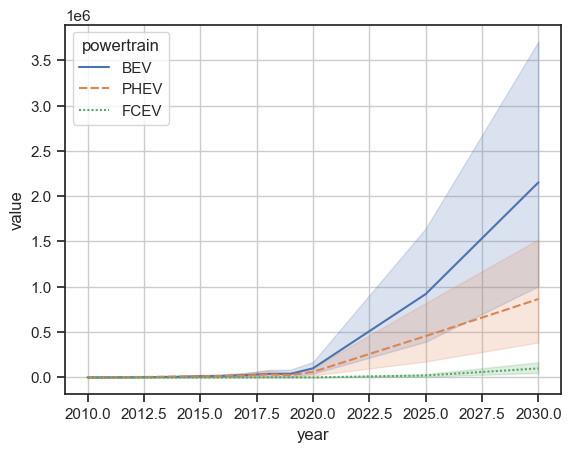

In [18]:
sns.lineplot(data=df[df['parameter']=='EV sales'], x="year", y="value", hue='powertrain', style='powertrain')
plt.grid()
plt.show()


In [19]:
df_stock = df[df['parameter']=='EV stock']
df_stock.head()

,region,category,parameter,mode,powertrain,year,unit,value
1,Australia,Historical,EV stock,Cars,BEV,2011,NaN,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,NaN,222.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,NaN,80.0
10,Australia,Historical,EV stock,Cars,BEV,2013,NaN,413.0
14,Australia,Historical,EV stock,Cars,PHEV,2013,NaN,182.0


In [20]:
df_sales = df[df['parameter']=='EV sales']
df_sales.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,NaN,49.0
3,Australia,Historical,EV sales,Cars,BEV,2012,NaN,173.0
7,Australia,Historical,EV sales,Cars,PHEV,2012,NaN,80.0
9,Australia,Historical,EV sales,Cars,BEV,2013,NaN,191.0
13,Australia,Historical,EV sales,Cars,PHEV,2013,NaN,102.0


In [21]:
df_sales_share = df[df['parameter']=='EV sales share']
df_sales_share.head()

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.006
5,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.029
11,Australia,Historical,EV sales share,Cars,EV,2013,percent,0.033
17,Australia,Historical,EV sales share,Cars,EV,2014,percent,0.149
23,Australia,Historical,EV sales share,Cars,EV,2015,percent,0.191


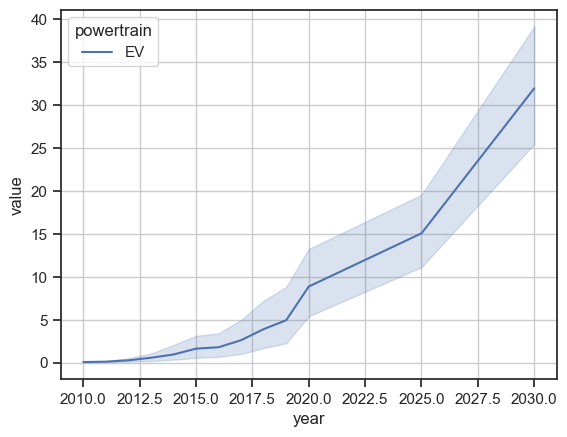

In [22]:

sns.lineplot(data=df_sales_share, x="year", y="value", hue='powertrain', style='powertrain')
plt.grid()
plt.show()

In [23]:
df_stock_share = df[df['parameter']=='EV stock share']
df_stock_share.head()

,region,category,parameter,mode,powertrain,year,unit,value
6,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.003
12,Australia,Historical,EV stock share,Cars,EV,2013,percent,0.005
18,Australia,Historical,EV stock share,Cars,EV,2014,percent,0.016
24,Australia,Historical,EV stock share,Cars,EV,2015,percent,0.031
30,Australia,Historical,EV stock share,Cars,EV,2016,percent,0.041


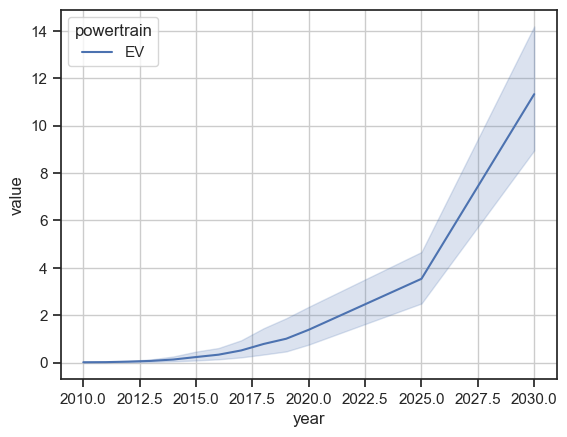

In [24]:
sns.lineplot(data=df_stock_share, x="year", y="value", hue='powertrain', style='powertrain')
plt.grid()
plt.show()

In [25]:
df_chargers = df[df['parameter']=='EV chargers']
df_chargers.head()

,region,category,parameter,mode,powertrain,year,unit,value
39,Australia,Historical,EV chargers,NaN,Publicly available fast,2017,NaN,40.000000
40,Australia,Historical,EV chargers,NaN,Publicly available slow,2017,NaN,436.000000
47,Australia,Historical,EV chargers,NaN,Publicly available fast,2018,NaN,61.094002
48,Australia,Historical,EV chargers,NaN,Publicly available slow,2018,NaN,665.922974
55,Australia,Historical,EV chargers,NaN,Publicly available fast,2019,NaN,251.000000


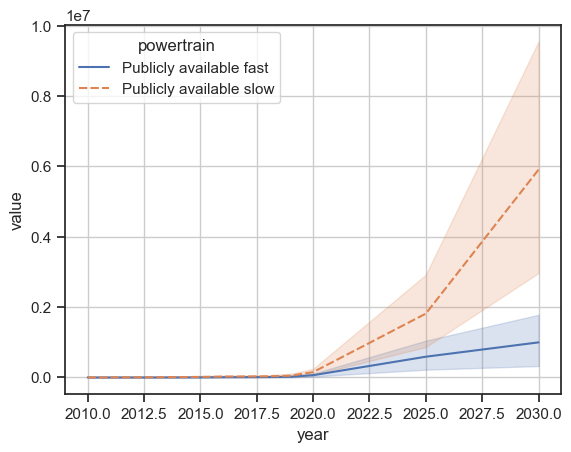

In [26]:
sns.lineplot(data=df_chargers, x="year", y="value", hue='powertrain', style='powertrain')
plt.grid()
plt.show()

In [27]:
from pandas import unique
list_regions = unique(df_chargers.sort_values(by=['value'], ascending=False)['region'][0:200])
print(list_regions)

['World' 'China' 'Europe' 'Rest of the world' 'USA' 'India' 'Netherlands'
 'Korea' 'France' 'Germany' 'United Kingdom' 'Japan' 'Other Europe'
 'Italy' 'Norway' 'Canada' 'Sweden' 'Belgium' 'Switzerland' 'Spain']


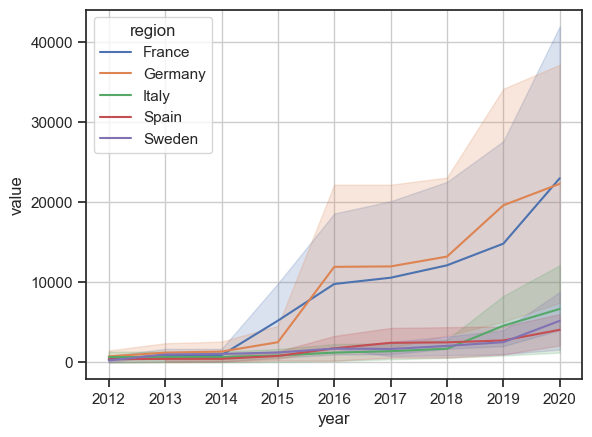

In [28]:
sns.lineplot(data=df_chargers[df_chargers['region'].isin(['Spain', 'Germany','France', 'Italy', 'Sweden'])],
             x="year",
             y="value",
             hue='region')
plt.grid()
plt.show()

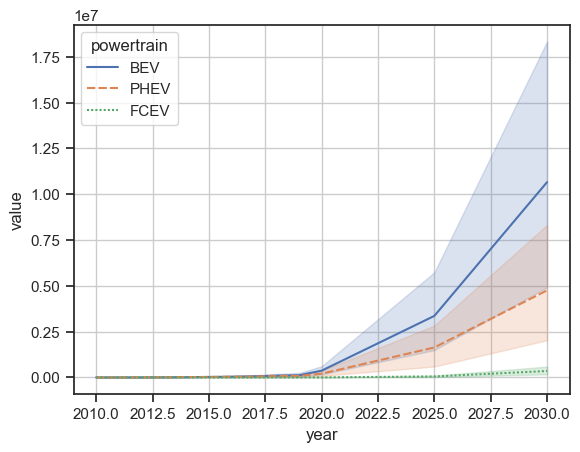

In [29]:

sns.lineplot(data=df_stock, x="year", y="value", hue='powertrain', style='powertrain')
plt.grid()
plt.show()


In [30]:
print(' -- powertrain -- ')
for id, param in enumerate(df['powertrain'].unique()):
    print('({}) {}'.format(id,param))

 -- powertrain -- 
(0) BEV
(1) EV
(2) PHEV
(3) Publicly available fast
(4) Publicly available slow
(5) FCEV


In [31]:
print(' -- Units -- ')
for id, param in enumerate(df['unit'].unique()):
    print('({}) {}'.format(id,param))

 -- Units -- 
(0) nan
(1) percent
(2) GWh
(3) Milion liters of gasoline equivalent
